<a href="https://colab.research.google.com/github/rida-manzoor/DL/blob/main/Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

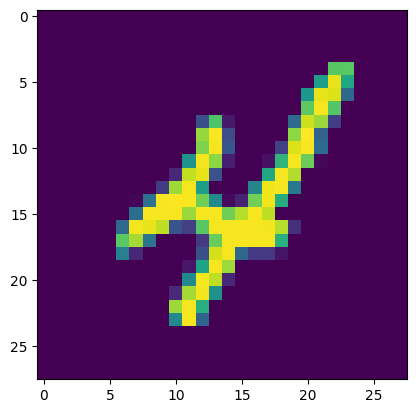

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[9])

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
model = Sequential()

In [7]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
# Difference between categorical_crossentropy and sparse_categorical_crossentropy is that we don't have to encode target column in case of sparse_categorical_crossentropy

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [9]:
history = model.fit(x_train,y_train,epochs=18,validation_split=0.2)

Epoch 1/18
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2825 - val_loss: 0.1452
Epoch 2/18
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1191 - val_loss: 0.1188
Epoch 3/18
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0841 - val_loss: 0.1089
Epoch 4/18
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0608 - val_loss: 0.1077
Epoch 5/18
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0483 - val_loss: 0.0887
Epoch 6/18
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0403 - val_loss: 0.0934
Epoch 7/18
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0329 - val_loss: 0.1020
Epoch 8/18
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0268 - val_loss: 0.0909
Epoch 9/18
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0204 - val_loss: 0.1204
Epoch 10/18
1500/1500 [==============================] - 4s 3ms/step - loss: 0.020

In [10]:
y_prob = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [11]:
y_prob

array([[1.00941477e-11, 2.24231380e-11, 3.89405556e-11, ...,
        9.99999702e-01, 4.90916509e-12, 9.86412618e-10],
       [8.97898336e-12, 1.09286052e-11, 9.99999940e-01, ...,
        4.94074334e-21, 2.41485197e-14, 6.58966843e-20],
       [1.49797327e-10, 9.99998629e-01, 4.49127455e-08, ...,
        4.64354656e-07, 7.45183172e-07, 1.76468884e-08],
       ...,
       [1.74831680e-25, 2.22732362e-14, 1.13846875e-23, ...,
        1.42378763e-12, 8.10773531e-16, 6.04975314e-09],
       [3.91055451e-20, 2.48772274e-18, 2.60282881e-25, ...,
        1.44641616e-19, 4.15970536e-10, 1.82847904e-16],
       [1.07131573e-19, 1.46023691e-27, 1.04304855e-24, ...,
        6.01371860e-32, 1.42587236e-19, 7.91817051e-23]], dtype=float32)

In [12]:
y_pred=y_prob.argmax(axis=1)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9762

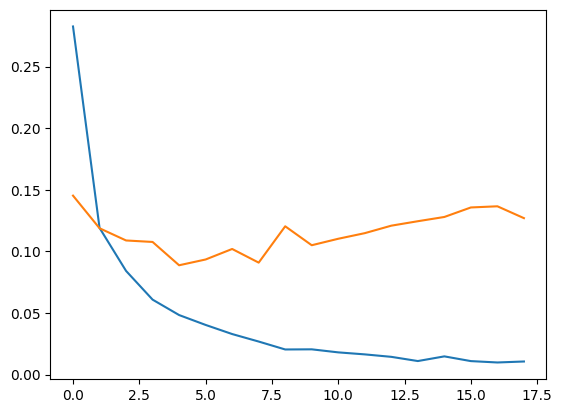

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

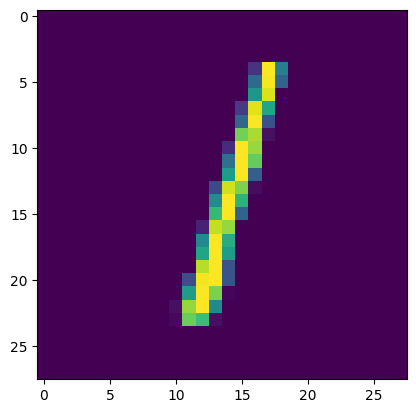

In [16]:
plt.imshow(x_test[2])

In [17]:
model.predict(x_test[2].reshape(1,28,28))

1/1 [==============================] - 0s 15ms/step


array([[1.4979706e-10, 9.9999869e-01, 4.4912746e-08, 3.3453798e-13,
        2.0523373e-08, 1.2537402e-09, 2.0987979e-10, 4.6435468e-07,
        7.4518323e-07, 1.7646890e-08]], dtype=float32)

In [18]:
model.predict(x_test[2].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 29ms/step


array([1])